In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
import cmath
from numba import njit, f8,i8,c16
import numba

import sys
sys.path.append('../../lb')
import RungeKutta_acceralated

#パラメーター
nu = 0.001
f = (1 + 1j) * 5 * 0.001
Dimention = 14 #uの次元数
q = 2
k_0 = 2 ** (-4)
k_n = np.zeros((Dimention+4,1))
k_n[2:-2,0] = [k_0 * q ** (i+1) for i in range(Dimention)]
#print(k_n)

c_n_1 = copy.deepcopy(k_n)[2:-2, 0:]
c_n_1[-2:, 0:] = np.zeros((2,1))
#print(c_n_1)

beta = 0.5
c_n_2 = copy.deepcopy(k_n)[1:-3, 0:] * -beta
c_n_2[-1, 0] = np.zeros((1, 1))
# print(c_n_2)

c_n_3 = copy.deepcopy(k_n)[:-4, 0:] * (beta - 1)
#print(c_n_3)

#parameter = [nu,f,k_n,c_n_1,c_n_2,c_n_3]
parameter = {
    'nu' : nu,
    'f' : f,
    'k_n' : k_n,
    'c_n_1' : c_n_1,
    'c_n_2' : c_n_2,
    'c_n_3' : c_n_3
}
#print(parameter)
# print(k_n)

runge_para = {
    'step' : 0.01,
    'nu' : nu,
    'f' : f,
    'k_n' : k_n,
    'c_n_1' : c_n_1,
    'c_n_2' : c_n_2,
    'c_n_3' : c_n_3
}



In [2]:
laminar = np.load("/Users/hibiki/Downloads/beta0.423_nu0.00017584784643038092_step0.01_1500check_500pro_200000period.npz")["laminar"]

In [3]:
#刻み幅
runge_para["step"] = 0.01
skip= 1

check = 1500
progress = 500

#nu
runge_para["nu"] = 0.00017584784643038092
#betaの値に従いc_n_2,c_n_3を更新
beta = 0.423

#c_n_2
runge_para["c_n_2"] = runge_para["k_n"][1:-3, 0:] * -beta
runge_para["c_n_2"][-1, 0:] = np.zeros((1, 1))
#c_n_3
runge_para["c_n_3"] = runge_para["k_n"][:-4, 0:] * (beta - 1)

In [6]:
seed = laminar[:-1,49999::50000] # a step before perturbated data
raw = np.zeros((laminar[:-1,49999::50000].shape[0],laminar[:-1,49999::50000].shape[1]), dtype=np.complex128) #zero array contain not perturbated data
for i in range(laminar[:-1,49999::50000].shape[1]):
    raw[:,i:i+1] = RungeKutta_acceralated.RungeKutta.rk4(x=0,y=seed[:,i:i+1], **runge_para, func=RungeKutta_acceralated.RungeKutta.goy_shell_model)

a=abs(laminar[:-1,50000::50000] - raw)**2
a = np.real(np.sum(a, axis = 0)) ** (1/2)

In [7]:
min(a[np.where(a>0)])

3.6412038277483415e-07

In [16]:
data = np.log10(a[np.where(a>0)])

In [17]:
data

array([-3.61519897, -3.93023915, -3.56783304, -4.90082521, -3.70142212,
       -3.80943804, -3.57007769, -3.90082959, -4.8353346 , -3.9739255 ,
       -4.39258601, -4.36239065, -3.76873088, -3.32851922, -4.44029702,
       -4.64199279, -5.28412199, -4.2081811 , -4.66418813, -4.46582586,
       -4.35681608, -3.27221534, -3.83788976, -3.00233178, -3.12352009,
       -4.28848374, -5.31198909, -3.66823611, -4.08227875, -3.02475006,
       -3.04642686, -5.03461998, -3.4905564 , -4.05968388, -4.28402381,
       -3.25152729, -4.5743889 , -3.88447727, -4.34820656, -4.51201447,
       -5.10635406, -5.84588399, -4.63907418, -5.11038635, -4.61090012,
       -5.3736182 , -5.20863274, -4.23259937, -4.55274197, -4.46351555,
       -3.07562991, -3.27779886, -5.61029154, -4.60587416, -5.02857099,
       -4.76018844, -4.2356499 , -6.39907764, -6.0697589 , -4.70447263,
       -4.35039718, -5.05370349, -4.06071893, -4.9487479 , -4.71381582,
       -4.45319258, -4.25933322, -6.18715708, -3.30890412, -5.47

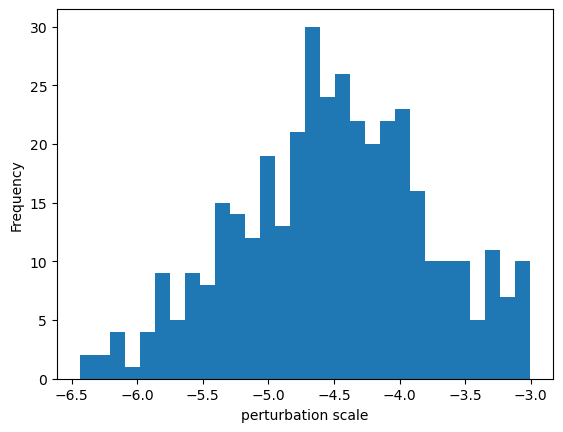

In [23]:
plt.ylabel("Frequency")
plt.xlabel("perturbation scale")
#plt.xscale("log")
dense = False
plt.hist(data, density=dense,bins=30)
plt.savefig(f"../distribution/perturbation_scale_distribution_beta{beta}_nu={runge_para['nu']}_0.01step.jpg")

In [71]:
a = laminar[:-1,0] - laminar[:-1,1]
a = a * np.conj(a)
b = np.real(np.sum(a, axis = 0)**(1/ 2))

In [72]:
b

0.00035224184122589357

In [69]:
c = np.abs(laminar[:-1,0]) - np.abs(laminar[:-1, 1])
c = c * c
d = np.sum(c, axis = 0) ** (1/2)

In [70]:
d

0.00022491750375836975

In [68]:
np.linalg.norm(laminar[:-1,0] - laminar[:-1,1])

0.0003522418412258936

In [63]:
np.lina

array([2.30104491e-09+6.32857375e-26j, 4.92509068e-09-6.23290403e-26j,
       1.11768268e-08-3.39940126e-25j, 7.48933112e-09-2.04155695e-25j,
       1.00721907e-09+3.70905139e-26j, 2.98368483e-08+2.95249572e-25j,
       3.99269415e-08+3.78960178e-25j, 6.90313917e-09+1.96689098e-26j,
       1.42191569e-08+1.25542542e-25j, 5.85049959e-09+5.35183395e-26j,
       4.33886209e-10+4.18959633e-27j, 4.33041496e-12+7.35177454e-29j,
       8.28697713e-17-1.63727030e-33j, 2.57845418e-22-5.67240113e-39j])

In [ ]:
np.linalg